<a href="https://colab.research.google.com/github/gawandepranil/INFOTACT/blob/main/AI_Powered_Task_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 1:** AI-Powered Task Management System

Week 1: Data Loading, EDA, NLP Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Loading

In [ ]:

df = pd.read_csv('/content/Task Assignment.csv.csv')

Step 1 : Data Preprocessing and EDA (Exploratory Data Analysis)

In [ ]:
# Rename the columns
df.rename(columns={
    'Unnamed: 3': 'Deadline',
    'Unnamed: 4': 'Priority',
    'Unnamed: 5': 'User Skills',
    'Unnamed: 6': 'Workload',
    'Unnamed: 7': 'Assigned User'
}, inplace=True)

In [ ]:
# counting unique Task Description,Category and skill
unique_tasks = df['Task Description'].unique()
print("Total unique task descriptions:", len(unique_tasks))

unique_categories = df['Category'].unique()
print("Total unique categories:", len(unique_categories))

unique_skills = df['Skill'].unique()
print("Total unique skills:", len(unique_skills))

Total unique task descriptions: 265
Total unique categories: 13
Total unique skills: 232


In [ ]:
# Counting and removing duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 19333


In [ ]:
df = df.drop_duplicates()
print("shape:",df.shape)
df.head()

shape: (789, 8)


,Task Description,Category,Skill,Deadline,Priority,User Skills,Workload,Assigned User
0,Implement user authentication,backend,spring boot,NaN,NaN,NaN,NaN,NaN
1,Optimize server performance,backend,asp.net,NaN,NaN,NaN,NaN,NaN
2,Manage database operations,backend,django,NaN,NaN,NaN,NaN,NaN
3,Implement user authentication,backend,api,NaN,NaN,NaN,NaN,NaN
4,Build a microservice,backend,kotlin,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking null values
print("Null values:\n", df.isnull().sum())


Null values:
 Task Description      0
Category              0
Skill                 0
Deadline            789
Priority            789
User Skills         789
Workload            789
Assigned User       789
dtype: int64


In [ ]:
# Drop rows where Task Description or Skill is missing
df.dropna(subset=['Task Description', 'Skill'], inplace=True)

/tmp/ipython-input-385-1234581514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Task Description', 'Skill'], inplace=True)


In [ ]:
#  Distribution of task categories
print("Category distribution:\n", df['Category'].value_counts())

Category distribution:
 Category
ai/ml                      127
backend                    122
frontend                   112
devops                      74
deployment                  71
database administration     64
testing                     58
project management          58
documentation               53
cloud                       35
data science                 5
database                     5
ui/ux design                 5
Name: count, dtype: int64


In [ ]:
print("\nSkill distribution:\n", df['Skill'].value_counts())


Skill distribution:
 Skill
aws                    15
docker                 15
kubernetes             15
google cloud           14
heroku                 13
                       ..
Logistic Regression     1
pytorch                 1
apache spark            1
nltk                    1
tensorflow              1
Name: count, Length: 232, dtype: int64


In [ ]:
all_skills = df['Skill'].dropna().str.lower().str.split(',').sum()
unique_skills = list(set([skill.strip() for skill in all_skills]))


In [ ]:
users = [
    'Ram', 'abhay', 'ashwith', 'Charu','Aarav', 'Maahi', 'Ramesh', 'karn', 'Karthik', 'Anaaaya',
    'Digvijay', 'Sam', 'Arjun','Neeru', 'prabhas', 'keerthan', 'bhargav', 'ramya', 'sushma', 'bindhu',
    'vaishu','jaya', 'deepthi', 'aadhya', 'Mahesh', 'raakhi', 'tanush', 'Divya', 'kiran', 'Nishila',
    'nikitha', 'krishna', 'abhimanyu', 'krish', 'parnika', 'amani', 'Harshitha', 'Pranavi', 'aaradhya', 'Arnav'
]
# Assign 3–4 random skills from unique_skills to each user
user_skill_map = {}
for user in users:
    assigned_skills = random.sample(unique_skills, random.choice([3, 4]))
    user_skill_map[user] = assigned_skills



for user, skills in user_skill_map.items():
    print(f"{user}: {skills}")


Ram: ['u-net', 'linear regression', 'gpt-3']
abhay: ['ms project', 'show and tell', 'tesseract', 'ci/cd']
ashwith: ['gitlab', 'sql', 'yolov5', 'keras']
Charu: ['praat', 'javascript', 'tacotron', 'postgresql']
Aarav: ['linear regression', 'microsoft project', 'rnn', 'alibi detect']
Maahi: ['vader', 'nltk', 'carla']
Ramesh: ['cypress', 'randomforest', 'redis']
karn: ['mocha', 'densenet', 'agile', 'transformer']
Karthik: ['marianmt', 'server configuration', 'css']
Anaaaya: ['docker', 'jest', 'liwc']
Digvijay: ['azure', 'borutapy', 'logistic regression']
Sam: ['pytest', 'cnn', 'proximal policy optimization', 'yolo']
Arjun: ['deoldify', 'continuous deployment', 'spring boot']
Neeru: ['pytest', 'u-net', 'lda']
prabhas: ['apache spark', 'adtk', 'gpt-2', 'ruby']
keerthan: ['pca', 'pandas', 'vue']
bhargav: ['nltk', 'rust', 'go', 'tesseract']
ramya: ['optuna', 'recurrent neural networks (rnn)', 'git']
sushma: ['tacotron', 'bert', 'stable baselines', 'gitlab']
bindhu: ['dqn', 'pytest', 'rake', 'n

In [ ]:
# adding deadlines
today = datetime.today().date()
df['Deadline'] = [today + timedelta(days=random.randint(1, 60)) for _ in range(len(df))]
# adding workload
df['Workload'] = np.random.randint(1, 11, size=len(df))
# adding priority

def assign_priority(row):
    days_left = (row['Deadline'] - today).days
    if days_left <= 7 or row['Workload'] >= 8:
        return 'High'
    elif days_left <= 20:
        return 'Medium'
    else:
        return 'Low'

df['Priority'] = df.apply(assign_priority, axis=1)

def find_best_user(required_skill):
    for user, skills in user_skill_map.items():
        # Check if the required skill is in the list of skills for the current user
        if isinstance(skills, list) and required_skill.lower() in [s.lower() for s in skills]:
            return user
    # If no user is found with the exact skill, return a random user from the user_skill_map keys
    return random.choice(list(user_skill_map.keys()))

# Apply the corrected function to the 'Skill' column
df['Assigned User'] = df['Skill'].apply(find_best_user)


In [ ]:
def get_user_skills(user):
    # Use user_skill_map to get skills for the user, default to an empty list if user not found
    return ', '.join(user_skill_map.get(user, []))

df['User Skills'] = df['Assigned User'].apply(get_user_skills)

In [ ]:
df.head()

,Task Description,Category,Skill,Deadline,Priority,User Skills,Workload,Assigned User
0,Implement user authentication,backend,spring boot,2025-08-21,Low,"deoldify, continuous deployment, spring boot",1,Arjun
1,Optimize server performance,backend,asp.net,2025-08-01,Low,"praat, javascript, tacotron, postgresql",4,Charu
2,Manage database operations,backend,django,2025-08-06,High,"hugging face, gitlab, efficientnet, randomforest",10,nikitha
3,Implement user authentication,backend,api,2025-08-25,Low,"pytest, u-net, lda",4,Neeru
4,Build a microservice,backend,kotlin,2025-08-19,Low,"pandas, als, kotlin",3,Harshitha


Step 2 : NLP Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    stems = [stemmer.stem(t) for t in tokens]
    return ' '.join(stems)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


 Applying preprocessing on task descriptions

In [ ]:
df['Processed_Description'] = df['Task Description'].apply(preprocess_text)

 Save cleaned dataset

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)
print(" Cleaned & enriched dataset saved as 'cleaned_dataset.csv'")

 Cleaned & enriched dataset saved as 'cleaned_dataset.csv'


In [ ]:
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Week 2: Feature Extraction, Classification (Naive Bayes & SVM), Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

In [ ]:
df = pd.read_csv("/content/cleaned_dataset.csv")

Checking and cleaning necessary columns

In [ ]:
df = df.dropna(subset=['Processed_Description', 'Category'])

Step 1 : Feature Extraction using TF-IDF / Word Embeddings

In [ ]:
X = df['Processed_Description']        # Input text
y = df['Category']                 # Target class for classification


tfidf = TfidfVectorizer(max_features=5000)
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


Step 2 : Task Classification

Using Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)


Using SVM

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)


Step 3 : Evaluation using Accuracy, Precision,Recall

In [ ]:
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("Report:\n", classification_report(y_true, y_pred))


In [ ]:
evaluate("Naive Bayes", y_test, nb_preds)


Naive Bayes Evaluation:
Accuracy : 0.9430379746835443
Precision: 0.9420009138812733
Recall   : 0.9430379746835443
Report:
                          precision    recall  f1-score   support

                  ai/ml       0.92      0.96      0.94        24
                backend       0.87      0.96      0.92        28
                  cloud       1.00      0.67      0.80         3
database administration       0.92      1.00      0.96        11
             deployment       0.86      1.00      0.92        12
                 devops       1.00      0.84      0.91        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      0.93      0.97        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy                           0.94       158
              macro avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
evaluate("SVM", y_test, svm_preds)


SVM Evaluation:
Accuracy : 0.9556962025316456
Precision: 0.9590365682137834
Recall   : 0.9556962025316456
Report:
                          precision    recall  f1-score   support

                  ai/ml       0.85      0.96      0.90        24
                backend       0.96      0.96      0.96        28
                  cloud       1.00      0.67      0.80         3
           data science       0.00      0.00      0.00         0
database administration       0.92      1.00      0.96        11
             deployment       1.00      0.92      0.96        12
                 devops       1.00      1.00      1.00        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      0.93      0.97        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Task Assignment

In [ ]:
def assign_user(task_skill, user_skills_series, workload_series, user_names):
    best_user = None
    min_workload = float('inf')

    for idx, user_skill_str in enumerate(user_skills_series):
        skill_list = [skill.strip().lower() for skill in user_skill_str.split(',')]
        if task_skill.lower() in skill_list:
            if workload_series.iloc[idx] < min_workload:
                min_workload = workload_series.iloc[idx]
                best_user = user_names.iloc[idx]

    return best_user if best_user else "Unassigned"

df['Assigned User'] = df.apply(
    lambda row: assign_user(row['Skill'], df['User Skills'], df['Workload'], df['Assigned User']),
    axis=1
)

In [ ]:
df[['Processed_Description', 'Category', 'Priority', 'Skill','Deadline' , 'User Skills','Assigned User']].head()



,Processed_Description,Category,Priority,Skill,Deadline,User Skills,Assigned User
0,implement user authent,backend,Low,spring boot,2025-08-21,"deoldify, continuous deployment, spring boot",Arjun
1,optim server perform,backend,Low,asp.net,2025-08-01,"praat, javascript, tacotron, postgresql",Unassigned
2,manag databas oper,backend,High,django,2025-08-06,"hugging face, gitlab, efficientnet, randomforest",Unassigned
3,implement user authent,backend,Low,api,2025-08-25,"pytest, u-net, lda",Unassigned
4,build microservic,backend,Low,kotlin,2025-08-19,"pandas, als, kotlin",Harshitha


In [ ]:
import joblib
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

Week 3: Priority Prediction + Workload Balancing + Tuning


Step 1: Preprocessing for Priority Prediction

In [ ]:
df = df.dropna(subset=['Priority'])

Encode categorical features


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_user = LabelEncoder()
df['Assigned User Encoded'] = le_user.fit_transform(df['Assigned User'].astype(str))


Convert Deadline to datetime and extract features

In [ ]:
df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')
df['Days Left'] = (df['Deadline'] - pd.to_datetime('today')).dt.days.fillna(0)

Drop rows with NaNs (if any remain)

In [ ]:
df = df.dropna()

Encode Priority (Target)

In [ ]:
le_priority = LabelEncoder()
df['Priority Encoded'] = le_priority.fit_transform(df['Priority'])

Features and Target

In [ ]:
X = df[['User Skills', 'Workload', 'Assigned User Encoded', 'Days Left']]
X['User Skills'] = X['User Skills'].astype(str).apply(lambda x: len(x.split(',')))  # Simple heuristic
y = df['Priority Encoded']

/tmp/ipython-input-414-4224982317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User Skills'] = X['User Skills'].astype(str).apply(lambda x: len(x.split(',')))  # Simple heuristic


### Step 2: Train/Test Split and Model Training (Random Forest/XGBoost)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

GridSearchCV for Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

Evaluation

In [ ]:
print("Best RF Params:", grid_rf.best_params_)
y_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_priority.classes_))

Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        54
         Low       1.00      1.00      1.00        74
      Medium       1.00      1.00      1.00        30

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



### XGBoost

In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

Define hyperparameter grid

In [ ]:
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

GridSearchCV for XGBoost

In [ ]:
grid_xgb = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'n_estimators': [50, 100]},
             scoring='accuracy')

Evaluation

In [ ]:
print("Best XGBoost Params:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names=le_priority.classes_))

Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        54
         Low       1.00      1.00      1.00        74
      Medium       1.00      1.00      1.00        30

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



### Step 3: Workload Balancing Logic (Simple Heuristic)

Heuristic: Assign to user with minimum workload and matching skills

In [ ]:
def assign_task(task_row):
    eligible_users = df[df['User Skills'] == task_row['User Skills']]
    if not eligible_users.empty:
        return eligible_users.loc[eligible_users['Workload'].idxmin()]['Assigned User']
    return random.choice(df['Assigned User'].dropna().unique())


Apply to unassigned rows or for simulation

In [ ]:
df['Recommended User'] = df.apply(assign_task, axis=1)
df[['User Skills', 'Workload', 'Recommended User']]

,User Skills,Workload,Recommended User
0,"deoldify, continuous deployment, spring boot",1,Arjun
1,"praat, javascript, tacotron, postgresql",4,Unassigned
2,"hugging face, gitlab, efficientnet, randomforest",10,Unassigned
3,"pytest, u-net, lda",4,Unassigned
4,"pandas, als, kotlin",3,Unassigned
...,...,...,...
784,"postgresql, praat, user-friendly, sentence-bert",1,Unassigned
785,"apache spark, adtk, gpt-2, ruby",8,prabhas
786,"docker, jest, liwc",6,Anaaaya
787,"vader, nltk, carla",9,Unassigned



Week 4 : Deliverables Breakdown

Step 1 : Finalize models for task classification and priority prediction.

Final Random Forest on Full Data with Best Parameters

In [ ]:
final_rf = RandomForestClassifier(
    n_estimators=grid_rf.best_params_['n_estimators'],
    max_depth=grid_rf.best_params_['max_depth'],
    min_samples_split=grid_rf.best_params_['min_samples_split'],
    random_state=42
)
final_rf.fit(X, y)

RandomForestClassifier(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Simple Task Classification Model (e.g., Assign Task Type Based on Skills)

Task classification heuristic based on 'User Skills'


In [ ]:

def classify_task(skill_str):
    skill_str = skill_str.lower()  # Case insensitive
    if 'python' in skill_str:
        return 'Programming'
    elif 'excel' in skill_str or 'data' in skill_str:
        return 'Data Analysis'
    else:
        return 'General Task'

df['Task Type'] = df['User Skills'].astype(str).apply(classify_task)

Predict priority on the dataset (assuming X_test, y_test exist)

In [ ]:
y_pred = final_rf.predict(X)

Calculate and print evaluation metrics for priority prediction

In [ ]:
accuracy = accuracy_score(y, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")



Random Forest Accuracy: 1.00


In [ ]:
print("\nClassification Report for Priority Prediction:")
print(classification_report(y, y_pred, target_names=le_priority.classes_))


Classification Report for Priority Prediction:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       295
         Low       1.00      1.00      1.00       378
      Medium       1.00      1.00      1.00       116

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



Plot Confusion Matrix

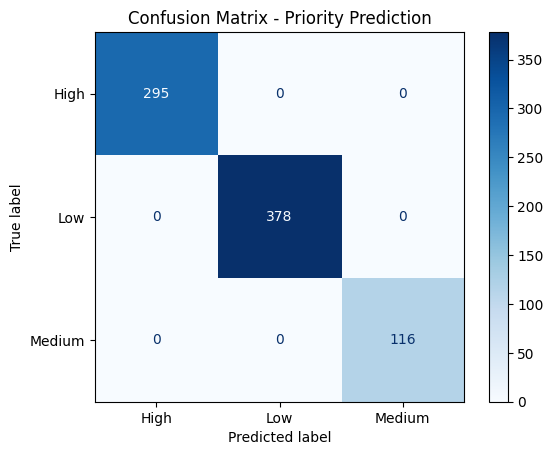

In [ ]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_priority.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Priority Prediction")
plt.savefig('confusion_matrix.png')
plt.show()

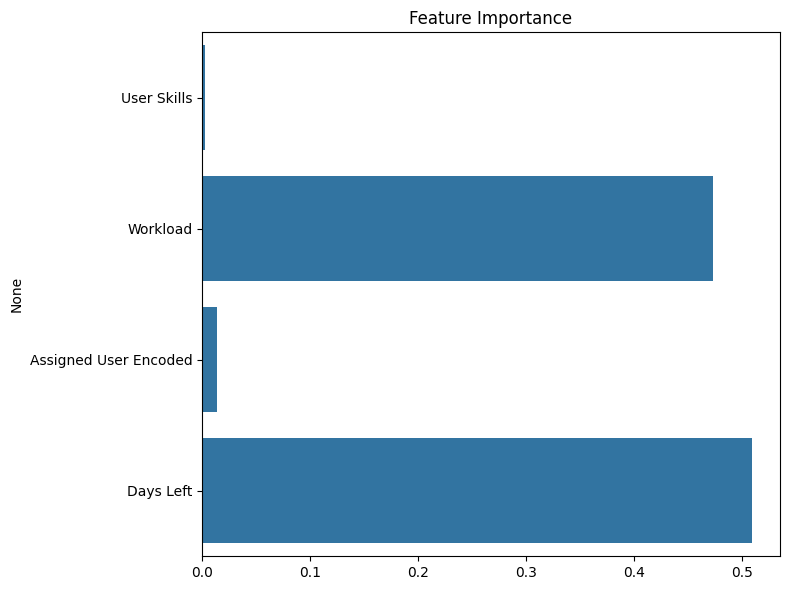

In [ ]:
importances = final_rf.feature_importances_
features = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

Add predicted priority to dataframe with readable labels



In [ ]:
df['Predicted Priority'] = le_priority.inverse_transform(final_rf.predict(X))

In [ ]:
summary = df[['User Skills', 'Workload', 'Assigned User', 'Priority', 'Predicted Priority', 'Task Type']]
print("\nSummary Table (Top 10 rows):")
print(summary.head(10))


Summary Table (Top 10 rows):
                                        User Skills  Workload Assigned User  \
0      deoldify, continuous deployment, spring boot         1         Arjun   
1           praat, javascript, tacotron, postgresql         4    Unassigned   
2  hugging face, gitlab, efficientnet, randomforest        10    Unassigned   
3                                pytest, u-net, lda         4    Unassigned   
4                               pandas, als, kotlin         3     Harshitha   
5            asciidoc, user-friendly, lstm, ansible         8    Unassigned   
6      optuna, recurrent neural networks (rnn), git         5    Unassigned   
7   pytest, cnn, proximal policy optimization, yolo         1    Unassigned   
8                         nltk, rust, go, tesseract         9       bhargav   
9   postgresql, praat, user-friendly, sentence-bert        10    Unassigned   

  Priority Predicted Priority     Task Type  
0      Low                Low  General Task  
1      L

Step 2 : Dashboard Mockup


Distribution plots for predicted priority

/tmp/ipython-input-435-1466417333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Predicted Priority', palette='viridis')


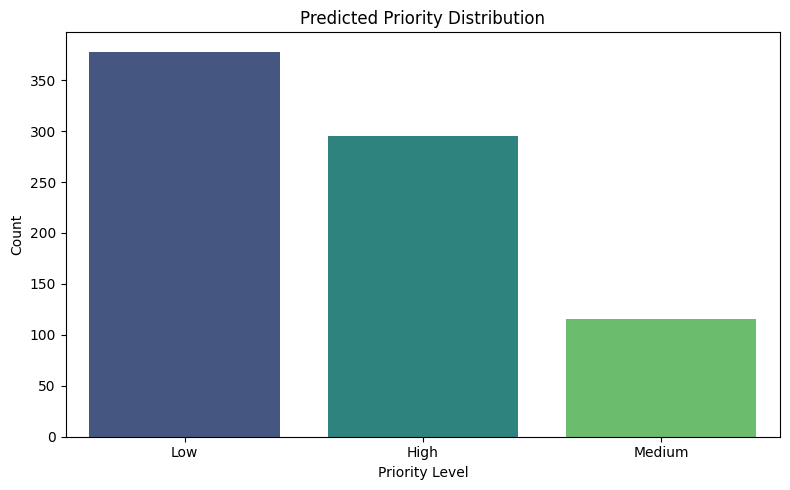

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Predicted Priority', palette='viridis')
plt.title('Predicted Priority Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('predicted_priority_distribution.png')
plt.show()


Distribution plots for task type

/tmp/ipython-input-436-988958463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Task Type', palette='coolwarm')


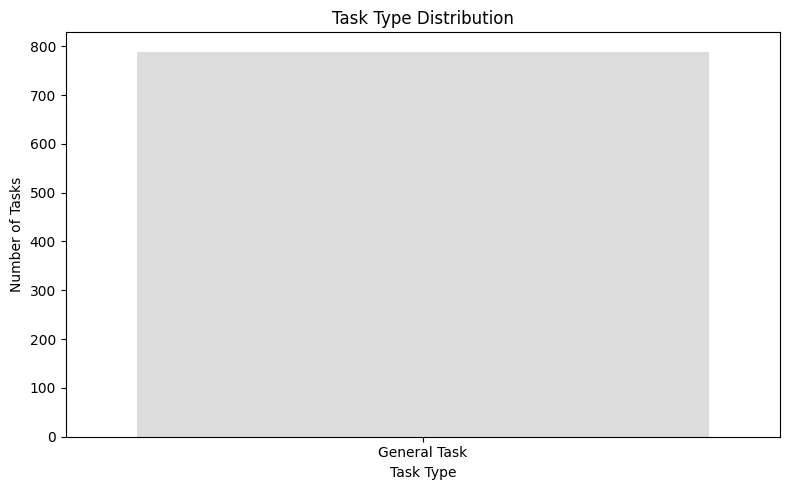

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Task Type', palette='coolwarm')
plt.title('Task Type Distribution')
plt.xlabel('Task Type')
plt.ylabel('Number of Tasks')
plt.tight_layout()
plt.savefig('task_type_distribution.png')
plt.show()

Export Output Summary to CSV

In [ ]:
summary.to_csv('Final_Task_Summary.csv', index=False)
print("Summary exported to Final_Task_Summary.csv")

Summary exported to Final_Task_Summary.csv


In [ ]:
from google.colab import files
files.download('Final_Task_Summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>